# Data Preparation

Redo data prep in this script 

In [1]:
import pandas as pd
import rdata
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

In [2]:
path_l2_trimmed = r"../data/version 1.1/primary data/eye tracking data/joint_data_l2_trimmed.rda"
l2_trimmed_parsed = rdata.parser.parse_file(path_l2_trimmed)
l2_trimmed_converted = rdata.conversion.convert(l2_trimmed_parsed)
original_df = l2_trimmed_converted['joint.data']
original_df

,subid,trialid,trialnum,itemid,cond,sentnum,ianum,ia,blink,skip,nrun,reread,nfix,refix,reg.in,reg.out,dur,firstrun.skip,firstrun.nfix,firstrun.refix,firstrun.reg.in,firstrun.reg.out,firstrun.dur,firstrun.gopast,firstrun.gopast.sel,firstfix.sac.in,firstfix.sac.out,firstfix.launch,firstfix.land,firstfix.cland,firstfix.dur,singlefix,singlefix.sac.in,singlefix.sac.out,singlefix.launch,singlefix.land,singlefix.cland,singlefix.dur,lang,trial,uniform_id
1,DU_04,1,1.0,1,1.0,6.0,141.0,he,0.0,0.0,2.0,1.0,2.0,0.0,1.0,0.0,464.0,1.0,1.0,0.0,1.0,0.0,278.0,0.0,0.0,-3,3,-5.0,2.0,0.5,278.0,1.0,-3,3,-5.0,2.0,0.5,278.0,du,None,du_4
2,DU_04,1,1.0,1,1.0,6.0,142.0,gave,0.0,0.0,2.0,1.0,2.0,0.0,0.0,1.0,480.0,0.0,1.0,0.0,0.0,1.0,164.0,944.0,480.0,11,-3,9.0,2.0,-0.5,164.0,1.0,11,-3,9.0,2.0,-0.5,164.0,du,None,du_4
3,DU_04,1,1.0,1,1.0,6.0,143.0,up,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,155.0,0.0,1.0,0.0,0.0,0.0,155.0,155.0,155.0,6,6,6.0,0.0,-1.5,155.0,1.0,6,6,6.0,0.0,-1.5,155.0,du,None,du_4
4,DU_04,1,1.0,1,1.0,6.0,144.0,painting,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,323.0,0.0,1.0,0.0,0.0,0.0,323.0,323.0,323.0,6,10,3.0,3.0,-1.5,323.0,1.0,6,10,3.0,3.0,-1.5,323.0,du,None,du_4
5,DU_04,1,1.0,1,1.0,6.0,145.0,and,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2147483648,-2147483648,NaN,NaN,NaN,NaN,0.0,-2147483648,-2147483648,NaN,NaN,NaN,NaN,du,None,du_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669949,tr_52,12,12.0,12,1.0,5.0,144.0,their,0.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,354.0,1.0,1.0,0.0,0.0,0.0,197.0,0.0,0.0,9,6,6.0,3.0,0.0,197.0,1.0,9,6,6.0,3.0,0.0,197.0,tr,None,tr_52
669950,tr_52,12,12.0,12,1.0,5.0,145.0,connectivity,0.0,0.0,3.0,1.0,4.0,1.0,1.0,1.0,872.0,1.0,1.0,0.0,0.0,0.0,222.0,0.0,0.0,6,13,3.0,3.0,-3.5,222.0,1.0,6,13,3.0,3.0,-3.5,222.0,tr,None,tr_52
669951,tr_52,12,12.0,12,1.0,5.0,146.0,in,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,220.0,1.0,1.0,0.0,0.0,0.0,220.0,0.0,0.0,9,5,9.0,0.0,-1.5,220.0,1.0,9,5,9.0,0.0,-1.5,220.0,tr,None,tr_52
669952,tr_52,12,12.0,12,1.0,5.0,147.0,personal,0.0,0.0,2.0,1.0,4.0,1.0,0.0,1.0,661.0,1.0,1.0,0.0,0.0,1.0,233.0,0.0,0.0,13,-11,13.0,0.0,-4.5,233.0,1.0,13,-11,13.0,0.0,-4.5,233.0,tr,None,tr_52


In [3]:
df = original_df

In [4]:
df.columns

Index(['subid', 'trialid', 'trialnum', 'itemid', 'cond', 'sentnum', 'ianum',
       'ia', 'blink', 'skip', 'nrun', 'reread', 'nfix', 'refix', 'reg.in',
       'reg.out', 'dur', 'firstrun.skip', 'firstrun.nfix', 'firstrun.refix',
       'firstrun.reg.in', 'firstrun.reg.out', 'firstrun.dur',
       'firstrun.gopast', 'firstrun.gopast.sel', 'firstfix.sac.in',
       'firstfix.sac.out', 'firstfix.launch', 'firstfix.land',
       'firstfix.cland', 'firstfix.dur', 'singlefix', 'singlefix.sac.in',
       'singlefix.sac.out', 'singlefix.launch', 'singlefix.land',
       'singlefix.cland', 'singlefix.dur', 'lang', 'trial', 'uniform_id'],
      dtype='object')

## Selection of First Pass duration (FP):
Time spent from first entering a word to first leaving it (including re-fixations within the word).


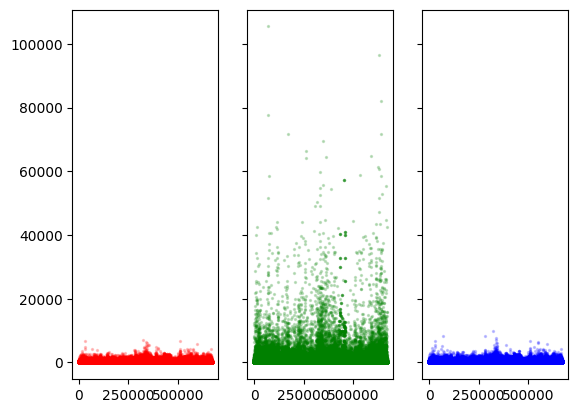

In [5]:
fig, ax = plt.subplots(ncols=3, sharey=True)
ax[0].scatter(df.index, df["firstrun.dur"], s=2, color = "red", alpha=0.2)
ax[1].scatter(df.index, df["firstrun.gopast"], s=2, color = "green", alpha=0.2)
ax[2].scatter(df.index, df["firstrun.gopast.sel"], s=2, color = "blue", alpha=0.2)
plt.show()

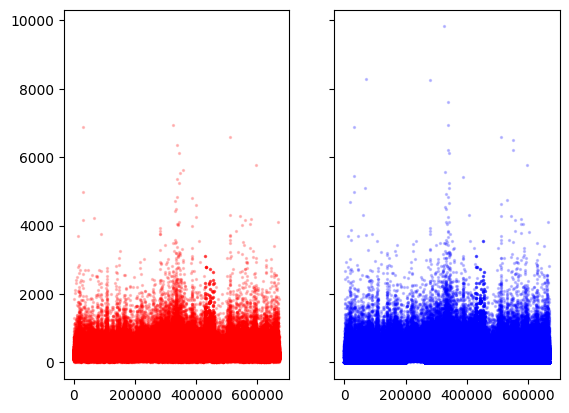

In [6]:
fig, ax = plt.subplots(ncols=2, sharey=True)
ax[0].scatter(df.index, df["firstrun.dur"], s=2, color = "red", alpha=0.2)
ax[1].scatter(df.index, df["firstrun.gopast.sel"], s=2, color = "blue", alpha=0.2)
plt.show()

In [7]:
df["firstrun.dur"].describe()

count    505043.000000
mean        290.402588
std         196.419997
min           2.000000
25%         178.000000
50%         241.000000
75%         343.000000
max        6932.000000
Name: firstrun.dur, dtype: float64

In [8]:
df["firstrun.gopast.sel"].describe()

count    505043.000000
mean        268.020836
std         247.274139
min           0.000000
25%         140.000000
50%         232.000000
75%         356.000000
max        9823.000000
Name: firstrun.gopast.sel, dtype: float64

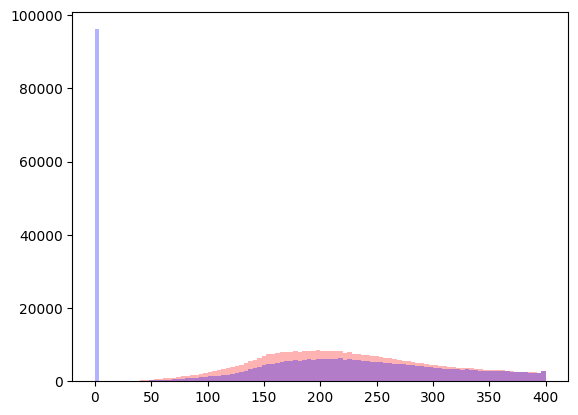

In [9]:
dur_cnt, dur_bins = np.histogram(df["firstrun.dur"], bins=100, range=(0, 400))
sel_cnt, sel_bins = np.histogram(df["firstrun.gopast.sel"], bins=100, range=(0, 400))

plt.hist(dur_bins[:-1], dur_bins, weights=dur_cnt, color="red", alpha=0.3)
plt.hist(sel_bins[:-1], sel_bins, weights=sel_cnt, color="blue", alpha=0.3)
plt.show()

## Validation of chosen matrics

In [10]:
tmp = df[["firstfix.dur", "firstrun.dur", "dur"]]

In [11]:
tmp[tmp["firstfix.dur"] > tmp["firstrun.dur"]]  #should be empty

,firstfix.dur,firstrun.dur,dur


In [12]:
tmp[tmp["firstrun.dur"] > tmp["dur"]]  #should be empty

,firstfix.dur,firstrun.dur,dur


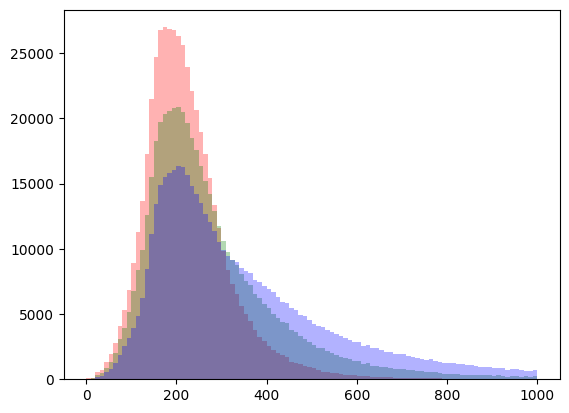

In [13]:
FF_cnt, FF_bins = np.histogram(df["firstfix.dur"], bins=100, range=(0, 1000))
FP_cnt, FP_bins = np.histogram(df["firstrun.dur"], bins=100, range=(0, 1000))
TF_cnt, TF_bins = np.histogram(df["dur"], bins=100, range=(0, 1000))

plt.hist(FF_bins[:-1], FF_bins, weights=FF_cnt, color="red", alpha=0.3)
plt.hist(FP_bins[:-1], FP_bins, weights=FP_cnt, color="green", alpha=0.3)
plt.hist(TF_bins[:-1], TF_bins, weights=TF_cnt, color="blue", alpha=0.3)
plt.show()

First Fixation duration (FF) Duration of the first fixation on a word\
-> firstfix.dur: Duration of the first fixation on the word (first fixation duration)

First Pass duration (FP) Time spent from first entering a word to first leaving it (including re-fixations within the word)\
-> firstrun.dur: Time the word was read during first-pass reading (gaze duration)

Total Fixation duration (TF) The sum of all fixation times on a word\
-> dur: Total time the word was read during the trial in ms (total reading time)

## Data preparation

In [14]:
df.head()

,subid,trialid,trialnum,itemid,cond,sentnum,ianum,ia,blink,skip,nrun,reread,nfix,refix,reg.in,reg.out,dur,firstrun.skip,firstrun.nfix,firstrun.refix,firstrun.reg.in,firstrun.reg.out,firstrun.dur,firstrun.gopast,firstrun.gopast.sel,firstfix.sac.in,firstfix.sac.out,firstfix.launch,firstfix.land,firstfix.cland,firstfix.dur,singlefix,singlefix.sac.in,singlefix.sac.out,singlefix.launch,singlefix.land,singlefix.cland,singlefix.dur,lang,trial,uniform_id
1,DU_04,1,1.0,1,1.0,6.0,141.0,he,0.0,0.0,2.0,1.0,2.0,0.0,1.0,0.0,464.0,1.0,1.0,0.0,1.0,0.0,278.0,0.0,0.0,-3,3,-5.0,2.0,0.5,278.0,1.0,-3,3,-5.0,2.0,0.5,278.0,du,None,du_4
2,DU_04,1,1.0,1,1.0,6.0,142.0,gave,0.0,0.0,2.0,1.0,2.0,0.0,0.0,1.0,480.0,0.0,1.0,0.0,0.0,1.0,164.0,944.0,480.0,11,-3,9.0,2.0,-0.5,164.0,1.0,11,-3,9.0,2.0,-0.5,164.0,du,None,du_4
3,DU_04,1,1.0,1,1.0,6.0,143.0,up,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,155.0,0.0,1.0,0.0,0.0,0.0,155.0,155.0,155.0,6,6,6.0,0.0,-1.5,155.0,1.0,6,6,6.0,0.0,-1.5,155.0,du,None,du_4
4,DU_04,1,1.0,1,1.0,6.0,144.0,painting,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,323.0,0.0,1.0,0.0,0.0,0.0,323.0,323.0,323.0,6,10,3.0,3.0,-1.5,323.0,1.0,6,10,3.0,3.0,-1.5,323.0,du,None,du_4
5,DU_04,1,1.0,1,1.0,6.0,145.0,and,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2147483648,-2147483648,NaN,NaN,NaN,NaN,0.0,-2147483648,-2147483648,NaN,NaN,NaN,NaN,du,None,du_4


In [15]:
def id_pivot(df):
    df = df[["uniform_id","itemid"]].drop_duplicates()
    df["dummy"] = 1
    df = df.pivot(index="uniform_id", columns="itemid", values="dummy")
    return df
    
id_pivot(df).describe().loc[["count"]]

itemid,1,10,11,12,2,3,4,5,6,7,8,9
count,422.0,388.0,384.0,365.0,430.0,436.0,408.0,382.0,375.0,384.0,399.0,399.0


Not funny - there is no text, which is read by all (543) participants.

In [16]:
def people_by_language(df):
    return df[["lang", "uniform_id"]].drop_duplicates().groupby("lang").count()
people_by_language(df).transpose()

lang,du,ee,en,fi,ge,gr,he,it,no,ru,sp,tr
uniform_id,47,58,45,51,45,48,45,51,40,47,41,25


Gonna find out which texts we may drop. "Criteria" function allows us to change the minimal number of languages we want to have in final dataframe and number of participants per language.

In [17]:
def filter_by_texts_count(df, N):
    # leave only people who read more N texts
    texts_per_person = id_pivot(df).count(axis=1)
    participants = texts_per_person[texts_per_person == N].index.values.__array__()
    df = df[df.uniform_id.isin(participants)]
    return df

def filter_by_text(df, text_list):
    # Remove entries with texts from list and leave only people who
    # read all remaining texts
    df = df[~ df.itemid.isin(text_list)]
    df = filter_by_texts_count(df, 12-len(text_list))
    return df

def criteria(df, languages, group_size):
    df = df[df.uniform_id >= group_size]
    count = int(df.count())
    return count >= languages

In [27]:
from IPython.display import Markdown

def greedy_exploration(df, min_tuple, max_tuple, min_languages, min_group_size):
    sizes_of_tuples = list(range(min_tuple, max_tuple+1))
    for tuple_size in sizes_of_tuples:  
        tuples_to_test = list(combinations(df.itemid.unique(), tuple_size))
        for t in tuples_to_test:
            df1 = filter_by_text(df, t)
            df2 = people_by_language(df1)

            if criteria(df2, min_languages, min_group_size):
                words = len(df1[["itemid", "sentnum", "ianum"]].drop_duplicates())
                display(Markdown('---'))
                print(f'Dropped texts: {t}')
                print(f'Words count: {words}')
                display(df2.transpose())

In [28]:
greedy_exploration(original_df, 6, 6, 4, 20)

---

Dropped texts: ('1', '4', '5', '12', '6', '8')
Words count: 756


lang,du,ee,en,fi,ge,gr,he,it,no,ru,sp,tr
uniform_id,5,20,10,29,23,6,7,20,12,10,14,3


---

Dropped texts: ('2', '4', '5', '12', '6', '8')
Words count: 906


lang,du,ee,en,fi,ge,gr,he,it,no,ru,sp,tr
uniform_id,8,21,11,30,23,7,4,20,13,10,15,4


---

Dropped texts: ('4', '5', '11', '12', '6', '8')
Words count: 868


lang,du,ee,en,fi,ge,gr,he,it,no,ru,sp,tr
uniform_id,4,22,12,31,22,10,7,20,11,10,15,4


---

Dropped texts: ('4', '5', '12', '6', '9', '8')
Words count: 888


lang,du,ee,en,fi,ge,gr,he,it,no,ru,sp,tr
uniform_id,5,25,11,31,23,5,5,20,11,9,15,3


---

Dropped texts: ('4', '5', '12', '6', '7', '8')
Words count: 831


lang,du,ee,en,fi,ge,gr,he,it,no,ru,sp,tr
uniform_id,5,21,13,30,23,8,5,21,10,9,15,3


---

Dropped texts: ('4', '5', '6', '9', '7', '8')
Words count: 997


lang,du,ee,en,fi,ge,gr,he,it,no,ru,sp,tr
uniform_id,5,20,12,33,23,5,5,21,10,8,13,3


In [29]:
greedy_exploration(original_df, 7, 7, 5, 20)

---

Dropped texts: ('5', '10', '11', '12', '6', '7', '8')
Words count: 711


lang,du,ee,en,fi,ge,gr,he,it,no,ru,sp,tr
uniform_id,5,26,21,36,20,13,10,21,11,12,17,7


---

Dropped texts: ('5', '11', '12', '6', '9', '7', '8')
Words count: 721


lang,du,ee,en,fi,ge,gr,he,it,no,ru,sp,tr
uniform_id,4,30,18,37,21,13,10,20,10,10,20,3


---

Dropped texts: ('10', '11', '12', '6', '9', '7', '8')
Words count: 782


lang,du,ee,en,fi,ge,gr,he,it,no,ru,sp,tr
uniform_id,5,30,20,41,21,10,16,19,10,10,20,8


## Dataframe modification

In [ ]:
texts_to_drop
df = filter_by_text(original_df, texts_to_drop)
df = df[["uniform_id", "lang", "itemid", "sentnum", "ianum", "ia", "skip", "dur", "firstrun.dur", "firstfix.dur"]]
df = df.rename(columns={"dur":"TF", "firstfix.dur":"FF", "firstrun.dur":"FP"})
df

In [ ]:
df[(df.skip == 0) & (df.TF.isna())] #should be empty

In [ ]:
df = df.fillna({"FF":0, "FP":0, "TF":0})

In [ ]:
len(df[["itemid", "sentnum", "ianum"]].drop_duplicates()) # expected ~900 words 